In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
# Path to your .pkl file
file_path = 'D:/Waffer Data/WM811K.pkl'

# Open and load the data from the file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

print(data)

        dieSize failureType   lotName trainTestLabel  waferIndex  \
0        1683.0        none      lot1       Training         1.0   
1        1683.0        none      lot1       Training         2.0   
2        1683.0        none      lot1       Training         3.0   
3        1683.0        none      lot1       Training         4.0   
4        1683.0        none      lot1       Training         5.0   
...         ...         ...       ...            ...         ...   
811452    600.0   Edge-Ring  lot47542           Test        23.0   
811453    600.0    Edge-Loc  lot47542           Test        24.0   
811454    600.0   Edge-Ring  lot47542           Test        25.0   
811455    600.0      [0, 0]  lot47543         [0, 0]         1.0   
811456    600.0      [0, 0]  lot47543         [0, 0]         2.0   

                                                 waferMap  
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2  

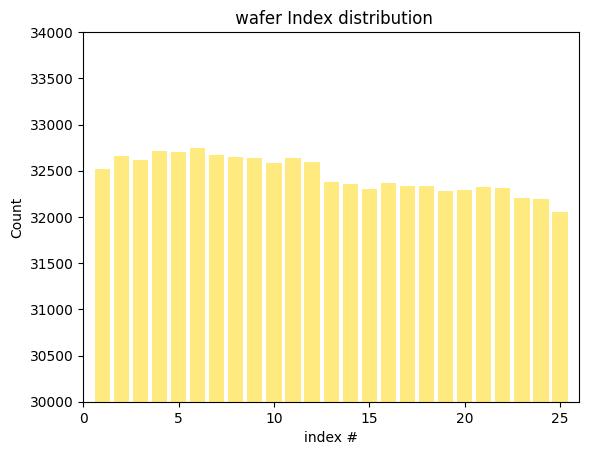

In [3]:
df = pd.DataFrame(data)


uni_Index=np.unique(df.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='gold', align='center', alpha=0.5)
plt.title(" wafer Index distribution")
plt.xlabel("index #")
plt.ylabel("Count")
plt.xlim(0,26)
plt.ylim(30000,34000)
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dieSize         811457 non-null  float64
 1   failureType     811457 non-null  object 
 2   lotName         811457 non-null  object 
 3   trainTestLabel  811457 non-null  object 
 4   waferIndex      811457 non-null  float64
 5   waferMap        811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


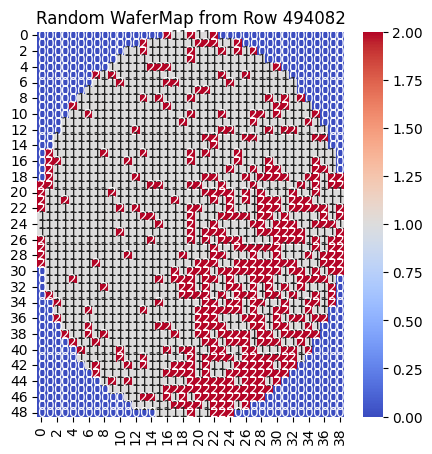

In [5]:
# Select a random row
random_row = df.sample(n=1).iloc[0]

# Extract the waferMap matrix from the selected row
wafer_map = random_row['waferMap']

# Display the waferMap matrix using seaborn heatmap or matplotlib
plt.figure(figsize=(5, 5))
sns.heatmap(wafer_map, cmap='coolwarm', square=True, annot=True, cbar=True)

# Add title showing which row was randomly selected
plt.title(f'Random WaferMap from Row {random_row.name}')
plt.show()

In [6]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

,dieSize,failureType,lotName,trainTestLabel,waferIndex,waferMap,waferMapDim
115685,710.0,"[0, 0]",lot7715,"[0, 0]",4.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,...","(32, 29)"
478082,1513.0,"[0, 0]",lot29558,"[0, 0]",12.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(49, 39)"
516310,515.0,"[0, 0]",lot32249,"[0, 0]",3.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...","(25, 27)"
594827,1513.0,"[0, 0]",lot37240,"[0, 0]",10.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(49, 39)"
174098,515.0,"[0, 0]",lot11140,"[0, 0]",15.0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1,...","(25, 27)"


In [7]:
max(df.waferMapDim), min(df.waferMapDim)

((300, 202), (6, 21))

In [8]:
uni_waferDim=np.unique(df.waferMapDim, return_counts=True)
uni_waferDim[0].shape[0]

632

In [9]:
print(df['failureType'].apply(type).value_counts())  # Check the data types in the 'failureType' column
print(df['trainTestLabel'].apply(type).value_counts())  # Check the data types in the 'trainTestLabel' column

failureType
<class 'numpy.ndarray'>    638507
<class 'str'>              172950
Name: count, dtype: int64
trainTestLabel
<class 'numpy.ndarray'>    638507
<class 'str'>              172950
Name: count, dtype: int64


In [10]:
# Check if a row has either or both failure types as ndarray
def check_ndarray(x):
    # Check if the value is a list or array, return True if it is
    if isinstance(x, np.ndarray) or (isinstance(x, list) and any(isinstance(i, np.ndarray) for i in x)):
        return True
    return False

# Apply the check and filter rows
rows_with_ndarray = df[df['failureType'].apply(check_ndarray)]

# Apply the check and get a boolean mask for rows with ndarray
mask = df['failureType'].apply(check_ndarray)

# Print the number of rows that satisfy the condition
print(f"Number of rows with either one or both failure types as ndarray: {len(rows_with_ndarray)}")

# Remove the rows where failureType contains ndarray
df_cleaned = df[~mask]

# Print the number of rows that were removed
print(f"Number of rows removed: {mask.sum()}")

Number of rows with either one or both failure types as ndarray: 638507
Number of rows removed: 638507


In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172950 entries, 0 to 811454
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dieSize         172950 non-null  float64
 1   failureType     172950 non-null  object 
 2   lotName         172950 non-null  object 
 3   trainTestLabel  172950 non-null  object 
 4   waferIndex      172950 non-null  float64
 5   waferMap        172950 non-null  object 
 6   waferMapDim     172950 non-null  object 
dtypes: float64(2), object(5)
memory usage: 10.6+ MB


In [12]:
duplicates = df_cleaned[df_cleaned.duplicated(subset=['dieSize', 'failureType','waferIndex','lotName'])].sum()

duplicates

dieSize           0.0
failureType         0
lotName             0
trainTestLabel      0
waferIndex        0.0
waferMap            0
waferMapDim         0
dtype: object

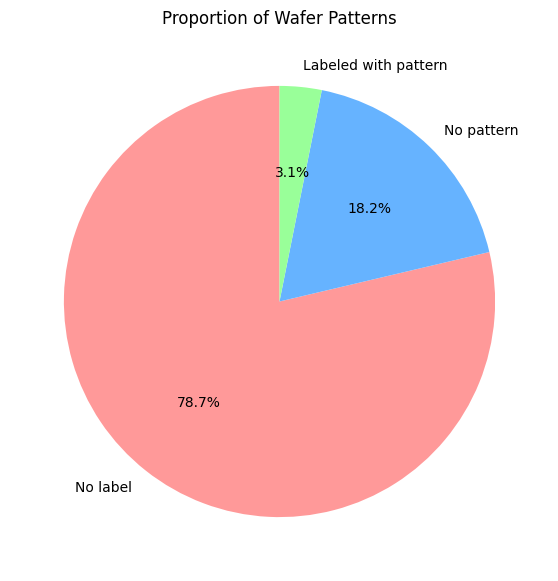

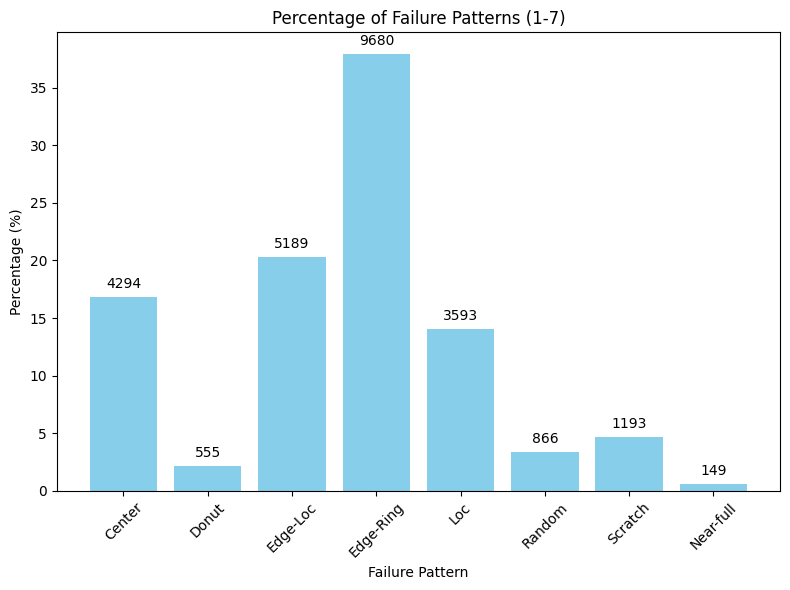

In [13]:
# Mapping of failure types to numerical values
mapping_type = {'Center': 0, 'Donut': 1, 'Edge-Loc': 2, 'Edge-Ring': 3, 
                'Loc': 4, 'Random': 5, 'Scratch': 6, 'Near-full': 7, 'none': 8, 'Unknown' : 9}

# Classify the rows into 'No label', 'Pattern 1-7', and 'No pattern'
def classify_failure(x):
    if isinstance(x, np.ndarray) and np.array_equal(x, [0, 0]):
        return 'No label'
    elif isinstance(x, str) and mapping_type.get(x) in range(0, 8):
        return 'Labeled with pattern'
    elif isinstance(x, str) and mapping_type.get(x) == 8:
        return 'No pattern'

# Apply the classification to the failureType column
df['failure_class'] = df['failureType'].apply(classify_failure)

# Step 1: Plot the Pie Chart
labels_count = df['failure_class'].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Proportion of Wafer Patterns')
plt.show()

# Step 2: Plot the Bar Chart for Pattern 1-7 with Percentages
# Filter the patterns 1-7 and calculate their counts
pattern_0_to_7 = df[df['failure_class'] == 'Labeled with pattern']['failureType'].map(mapping_type)

# Count occurrences of patterns 1-7
pattern_0_to_7_count = pattern_0_to_7.value_counts().sort_index()

# Calculate percentages
total_labels = pattern_0_to_7_count.sum()  # Total number of 1-7 patterns
pattern_0_to_7_percent = (pattern_0_to_7_count / total_labels) * 100

# Create the bar chart with percentages
plt.figure(figsize=(8, 6))
bars = plt.bar(pattern_0_to_7_percent.index, pattern_0_to_7_percent, color='skyblue')

# Annotate the bars with the raw counts
for bar, count in zip(bars, pattern_0_to_7_count):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{count}', ha='center', va='bottom')

# Set the labels and title
plt.title('Percentage of Failure Patterns (1-7)')
plt.xlabel('Failure Pattern')
plt.ylabel('Percentage (%)')

# Customize x-axis ticks
plt.xticks(ticks=range(0, 8), labels=['Center','Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Random', 'Scratch', 'Near-full'], rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Function to check if the list is [0, 0] and return 'Unknown'
def replace_zero_zero(x):
    # Check if the element is exactly [0, 0]
    if isinstance(x, (list, np.ndarray)) and np.array_equal(x, [0, 0]):
        return 'Unknown'
    return x

# Step 1: Create a new DataFrame df_modified to keep the original df intact
df_modified = df.copy()

# Step 2: Apply the function to both 'failureType' and 'trainTestLabel' columns in df_modified
df_modified['failureType'] = df_modified['failureType'].apply(replace_zero_zero)
df_modified['trainTestLabel'] = df_modified['trainTestLabel'].apply(replace_zero_zero)

# Print the modified DataFrame (df_modified)
print("Modified DataFrame (df_modified):")
print(df_modified)


Modified DataFrame (df_modified):
        dieSize failureType   lotName trainTestLabel  waferIndex  \
0        1683.0        none      lot1       Training         1.0   
1        1683.0        none      lot1       Training         2.0   
2        1683.0        none      lot1       Training         3.0   
3        1683.0        none      lot1       Training         4.0   
4        1683.0        none      lot1       Training         5.0   
...         ...         ...       ...            ...         ...   
811452    600.0   Edge-Ring  lot47542           Test        23.0   
811453    600.0    Edge-Loc  lot47542           Test        24.0   
811454    600.0   Edge-Ring  lot47542           Test        25.0   
811455    600.0     Unknown  lot47543        Unknown         1.0   
811456    600.0     Unknown  lot47543        Unknown         2.0   

                                                 waferMap waferMapDim  \
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...    (45, 48)   
1  

In [15]:
df_modified['failureType'].unique()

array(['none', 'Loc', 'Unknown', 'Edge-Loc', 'Center', 'Edge-Ring',
       'Scratch', 'Random', 'Near-full', 'Donut'], dtype=object)

In [16]:
# Function to check if the list is [0, 0] and return 'Unknown'
def replace_zero_zero(x):
    if isinstance(x, (list, np.ndarray)) and np.array_equal(x, [0, 0]):
        return 'Unknown'
    return x

# Apply the replacement function to 'failureType' column in df_modified
df_modified['failureType'] = df_modified['failureType'].apply(replace_zero_zero)

# Step 1: Select a random lotName from df_modified
random_lot = df_modified['lotName'].sample(n=1).values[0]

# Step 2: Filter the DataFrame to get all rows (wafer indices) from the selected lot
lot_df = df_modified[df_modified['lotName'] == random_lot]

# Step 3: Display the failureType for each index in the selected lot
print(f"Randomly selected lot: {random_lot}")
print("Failure types in this lot:")

for idx, row in lot_df.iterrows():
    print(f"Index {row['waferIndex']}: Failure Type = {row['failureType']}")


Randomly selected lot: lot12572
Failure types in this lot:
Index 1.0: Failure Type = Unknown
Index 2.0: Failure Type = Unknown
Index 3.0: Failure Type = Unknown
Index 4.0: Failure Type = Unknown
Index 5.0: Failure Type = Unknown
Index 6.0: Failure Type = Unknown
Index 7.0: Failure Type = Unknown
Index 8.0: Failure Type = Unknown
Index 9.0: Failure Type = Unknown
Index 10.0: Failure Type = Unknown
Index 11.0: Failure Type = Unknown
Index 12.0: Failure Type = Unknown
Index 13.0: Failure Type = Unknown
Index 14.0: Failure Type = Unknown
Index 16.0: Failure Type = Unknown
Index 17.0: Failure Type = Unknown


In [17]:
mapping_type_reverse = {0: 'Center', 1: 'Donut', 2: 'Edge-Loc', 3: 'Edge-Ring', 4: 'Loc', 5: 'Random', 6: 'Scratch', 7: 'Near-full', 8: 'none', 9: 'Unknown'}


# UI Components
pattern_selector = widgets.Dropdown(
    options=[(mapping_type_reverse[i], i) for i in range(10)],  # from 0 to 9
    value=0,
    description='Pattern:',
)

sample_size_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=100,
    step=1,
    description='Samples:',
    continuous_update=False
)

random_toggle = widgets.Checkbox(
    value=False,
    description='Random Sample',
    disabled=False
)

generate_button = widgets.Button(
    description='Visualize',
    button_style='success',
    icon='eye'
)

In [18]:
output_area = widgets.Output()

In [19]:
# Function to visualize the selected wafer maps from the cleaned DataFrame
def visualize_pattern(b):
    # Clear previous output
    with output_area:
        clear_output(wait=True)
        
        # Get user inputs
        selected_pattern = pattern_selector.value
        num_samples = sample_size_slider.value
        random_sample = random_toggle.value
        
        # Filter the DataFrame based on the selected pattern (from the cleaned DataFrame)
        filtered_df = df_modified[df_modified['failureType'].map(mapping_type) == selected_pattern]
        
        # If random sampling is requested
        if random_sample:
            filtered_df = filtered_df.sample(n=num_samples)
        else:
            filtered_df = filtered_df.head(num_samples)
        
        # Determine number of rows needed based on 7 plots per row
        num_cols = 7
        num_rows = int(np.ceil(num_samples / num_cols))
        
        # Create subplots with the required number of rows and columns
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
        axes = axes.flatten()  # Flatten the axes array for easy indexing
        
        for i, (idx, row) in tqdm(enumerate(filtered_df.iterrows()), total=num_samples, desc="Plotting Wafer Maps"):
            wafer_map = row['waferMap']  # Assuming 'waferMap' contains a 2D array
            wafer_map_dim = wafer_map.shape  # Get the dimensions of the wafer map (rows, columns)
            
            sns.heatmap(wafer_map, ax=axes[i], cmap='coolwarm', cbar=False, square=True)
            axes[i].set_title(f'Sample {i+1} - Dim: {wafer_map_dim[0]}x{wafer_map_dim[1]}')
            axes[i].set_xticks([])
            axes[i].set_yticks([])
        
        # Turn off empty axes (in case num_samples is not a multiple of num_cols)
        for j in range(i+1, len(axes)):
            axes[j].axis('off')
        
        plt.suptitle(f'Selected Pattern: {mapping_type_reverse[selected_pattern]} (n={num_samples})')
        plt.tight_layout()
        plt.show()

In [20]:
# Link the button to the visualization function
generate_button.on_click(visualize_pattern)

In [21]:
# Display the UI
display(widgets.VBox([pattern_selector, sample_size_slider, random_toggle, generate_button, output_area]))

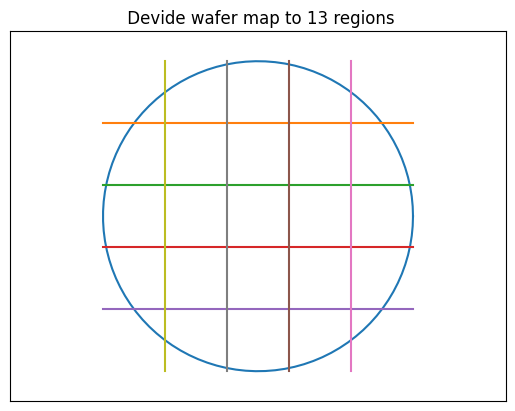

In [22]:
# illustration of 13 regions
an = np.linspace(0, 2*np.pi, 100)
plt.plot(2.5*np.cos(an), 2.5*np.sin(an))
plt.axis('equal')
plt.axis([-4, 4, -4, 4])
plt.plot([-2.5, 2.5], [1.5, 1.5])
plt.plot([-2.5, 2.5], [0.5, 0.5 ])
plt.plot([-2.5, 2.5], [-0.5, -0.5 ])
plt.plot([-2.5, 2.5], [-1.5,-1.5 ])

plt.plot([0.5, 0.5], [-2.5, 2.5])
plt.plot([1.5, 1.5], [-2.5, 2.5])
plt.plot([-0.5, -0.5], [-2.5, 2.5])
plt.plot([-1.5, -1.5], [-2.5, 2.5])
plt.title(" Devide wafer map to 13 regions")
plt.xticks([])
plt.yticks([])
plt.show()

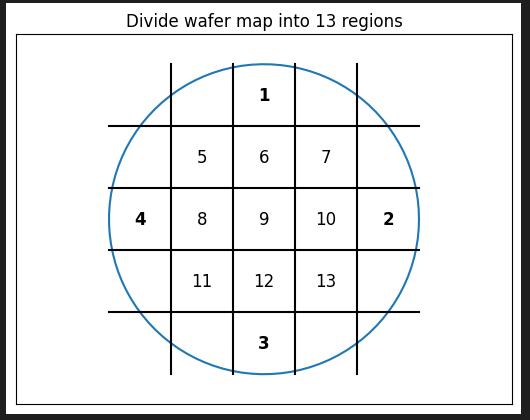

In [23]:
def cal_den(x):
    wafer_area = (x == 1) | (x == 2)  # Wafer area includes pixels with values 1 and 2
    total_wafer_pixels = np.sum(wafer_area)
    defect_pixels = np.sum(x == 2)
    return 100 * (defect_pixels / total_wafer_pixels) if total_wafer_pixels > 0 else 0

def find_regions(x):
    if x.size == 0:
        return [0] * 13
    rows, cols = x.shape

    # Divide rows and cols into 6 equal parts (creates 6 indices)
    ind1 = np.linspace(0, rows, 6, dtype=int)
    ind2 = np.linspace(0, cols, 6, dtype=int)

    # Handle cases where rows or cols are less than expected
    if len(ind1) < 6 or len(ind2) < 6:
        return [0] * 13

    # Define inner grid regions (regions 5-13)
    reg5 = x[ind1[2]:ind1[3], ind2[1]:ind2[2]]   # Top-left square
    reg6 = x[ind1[2]:ind1[3], ind2[2]:ind2[3]]   # Top-middle square
    reg7 = x[ind1[2]:ind1[3], ind2[3]:ind2[4]]   # Top-right square
    reg8 = x[ind1[3]:ind1[4], ind2[1]:ind2[2]]   # Middle-left square
    reg9 = x[ind1[3]:ind1[4], ind2[2]:ind2[3]]   # Center square
    reg10 = x[ind1[3]:ind1[4], ind2[3]:ind2[4]]  # Middle-right square
    reg11 = x[ind1[4]:ind1[5], ind2[1]:ind2[2]]  # Bottom-left square
    reg12 = x[ind1[4]:ind1[5], ind2[2]:ind2[3]]  # Bottom-middle square
    reg13 = x[ind1[4]:ind1[5], ind2[3]:ind2[4]]  # Bottom-right square

    # Define outer regions
    # Region 1: Top band (above the inner grid)
    reg1 = x[ind1[0]:ind1[2], ind2[1]:ind2[4]]
    # Region 2: Right band (right of the inner grid)
    reg2 = x[ind1[2]:ind1[5], ind2[4]:ind2[5]]
    # Region 3: Bottom band (below the inner grid)
    reg3 = x[ind1[4]:ind1[5], ind2[1]:ind2[4]]   # Rows 80:100, Cols 20:80
    # Region 4: Left band (left of the inner grid)
    reg4 = x[ind1[2]:ind1[5], ind2[0]:ind2[1]]

    # Calculate densities for each region
    fea_reg_den = [
        cal_den(reg1), cal_den(reg2), cal_den(reg3), cal_den(reg4),
        cal_den(reg5), cal_den(reg6), cal_den(reg7), cal_den(reg8),
        cal_den(reg9), cal_den(reg10), cal_den(reg11), cal_den(reg12), cal_den(reg13)
    ]
    return fea_reg_den



In [24]:
# Create a new DataFrame with the filtered data
df_modified_labelled = df_modified[~df_modified['failure_class'].isin(['No pattern', 'No label'])].reset_index(drop=True)


In [25]:
print(df_modified_labelled['trainTestLabel'].value_counts())

trainTestLabel
Training    17625
Test         7894
Name: count, dtype: int64


In [26]:
df_modified_labelled['fea_reg'] = df_modified_labelled['waferMap'].apply(find_regions)

In [27]:
# Get unique failure types
failure_types = df_modified_labelled['failureType'].unique()

# Create the dropdown widget for selecting failureType
failure_type_dropdown = widgets.Dropdown(
    options=failure_types,
    description='Failure Type:',
    disabled=False,
)

# Create a button to generate plots
generate_button = widgets.Button(
    description='Generate Plots',
    disabled=False,
    button_style='success',
    tooltip='Click to generate plots for selected failure type',
    icon='check'
)

# Output widget to display the plots
output = widgets.Output()

# Function to plot a wafer map with region separation lines
def plot_wafer_map_with_regions(wafer_map, title='Wafer Map'):
    plt.imshow(wafer_map, cmap='viridis', interpolation='none')
    plt.title(title)
    plt.colorbar(label='Value')
    plt.axis('off')

    rows, cols = wafer_map.shape
    ind1 = np.linspace(0, rows, 6, dtype=int)
    ind2 = np.linspace(0, cols, 6, dtype=int)

    # Draw horizontal lines
    for i in ind1:
        plt.axhline(i - 0.5, color='white', linewidth=1)

    # Draw vertical lines
    for j in ind2:
        plt.axvline(j - 0.5, color='white', linewidth=1)
        
# Function to plot histogram of fea_reg
def plot_fea_reg_histogram(fea_reg, title='Density Histogram'):
    regions = np.arange(1, 14)  # Regions 1 to 13
    plt.bar(regions, fea_reg)
    plt.xlabel('Region')
    plt.ylabel('Density (%)')
    plt.title(title)
    plt.xticks(regions)
    plt.ylim(0, 100)  # Assuming density is in percentage

# Function to handle the button click event
def on_generate_button_clicked(b):
    with output:
        clear_output(wait=True)
        selected_failure_type = failure_type_dropdown.value
        
        # Filter the DataFrame for the selected failureType
        df_filtered = df_modified_labelled[df_modified_labelled['failureType'] == selected_failure_type]
        
        # Check if there are enough samples
        if len(df_filtered) < 20:
            print(f"Not enough samples for failure type '{selected_failure_type}'. Found {len(df_filtered)} samples.")
            return
        
        # Randomly select 20 samples (10 pairs)
        random_samples = df_filtered.sample(n=20, random_state=42).reset_index(drop=True)
        
        # Loop over the samples in pairs
        for i in range(0, 20, 2):
            fig, axs = plt.subplots(2, 2, figsize=(12, 10))
            
            # First sample in the pair
            wafer_map1 = random_samples.loc[i, 'waferMap']
            fea_reg1 = random_samples.loc[i, 'fea_reg']
            
            # Second sample in the pair
            wafer_map2 = random_samples.loc[i+1, 'waferMap']
            fea_reg2 = random_samples.loc[i+1, 'fea_reg']
            
            # Plot wafer maps side by side with region lines
            plt.sca(axs[0, 0])
            plot_wafer_map_with_regions(wafer_map1, title=f'Wafer Map Sample {i+1}')
            
            plt.sca(axs[0, 1])
            plot_wafer_map_with_regions(wafer_map2, title=f'Wafer Map Sample {i+2}')
            
            # Plot histograms side by side
            plt.sca(axs[1, 0])
            plot_fea_reg_histogram(fea_reg1, title=f'Density Histogram Sample {i+1}')
            
            plt.sca(axs[1, 1])
            plot_fea_reg_histogram(fea_reg2, title=f'Density Histogram Sample {i+2}')
            
            plt.tight_layout()
            plt.show()

# Attach the event handler to the button
generate_button.on_click(on_generate_button_clicked)

# Display the widgets and output
display(failure_type_dropdown, generate_button, output)

Dropdown(description='Failure Type:', options=('Loc', 'Edge-Loc', 'Center', 'Edge-Ring', 'Scratch', 'Random', …

Button(button_style='success', description='Generate Plots', icon='check', style=ButtonStyle(), tooltip='Click…

Output()

In [29]:
from skimage.transform import radon

# Function to modify the wafer map images
def change_val(img):
    img = img.copy()  # Create a copy to avoid modifying the original image
    img[img == 1] = 0  # Set pixels with value 1 to 0
    return img

# Ensure 'new_waferMap' is in the DataFrame
if 'new_waferMap' not in df_modified_labelled.columns:
    df_modified_labelled['new_waferMap'] = df_modified_labelled['waferMap'].apply(change_val)

# Get unique failure types
failure_types = df_modified_labelled['failureType'].unique()

# Create the dropdown widget for selecting failureType
failure_type_dropdown = widgets.Dropdown(
    options=failure_types,
    description='Failure Type:',
    disabled=False,
)

# Create a button to generate plots
generate_button = widgets.Button(
    description='Generate Plots',
    disabled=False,
    button_style='success',
    tooltip='Click to generate plots for selected failure type',
    icon='check'
)

# Output widget to display the plots
output = widgets.Output()

# Function to plot a wafer map
def plot_wafer_map(wafer_map, title='Wafer Map'):
    plt.imshow(wafer_map, cmap='viridis', interpolation='none')
    plt.title(title)
    plt.axis('off')

# Function to plot the Radon transform (sinogram)
def plot_radon_transform(wafer_map, title='Radon Transform'):
    # Preprocess the wafer map
    img = change_val(wafer_map)
    
    # Compute the theta values for the Radon Transform
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    
    # Compute the Radon Transform (sinogram)
    sinogram = radon(img, theta=theta, circle=False)
    
    # Plot the sinogram
    plt.imshow(sinogram, cmap=plt.cm.Greys_r,
               extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
    plt.title(title)
    plt.xlabel('Projection angle (degrees)')
    plt.ylabel('Projection position (pixels)')
    plt.colorbar(label='Intensity')

# Function to handle the button click event
def on_generate_button_clicked(b):
    with output:
        clear_output(wait=True)
        selected_failure_type = failure_type_dropdown.value
        
        # Filter the DataFrame for the selected failureType
        df_filtered = df_modified_labelled[df_modified_labelled['failureType'] == selected_failure_type]
        
        # Check if there are enough samples
        if len(df_filtered) < 20:
            print(f"Not enough samples for failure type '{selected_failure_type}'. Found {len(df_filtered)} samples.")
            return
        
        # Randomly select 20 samples (10 pairs)
        random_samples = df_filtered.sample(n=20, random_state=42).reset_index(drop=True)
        
        # Loop over the samples in pairs
        for i in range(0, 20, 2):
            fig, axs = plt.subplots(2, 2, figsize=(12, 10))
            
            # First sample in the pair
            wafer_map1 = random_samples.loc[i, 'waferMap']
            wafer_map1_new = random_samples.loc[i, 'new_waferMap']
            
            # Second sample in the pair
            wafer_map2 = random_samples.loc[i+1, 'waferMap']
            wafer_map2_new = random_samples.loc[i+1, 'new_waferMap']
            
            # Plot wafer maps side by side
            plt.sca(axs[0, 0])
            plot_wafer_map(wafer_map1, title=f'Wafer Map Sample {i+1}')
            
            plt.sca(axs[0, 1])
            plot_wafer_map(wafer_map2, title=f'Wafer Map Sample {i+2}')
            
            # Plot Radon transforms side by side
            plt.sca(axs[1, 0])
            plot_radon_transform(wafer_map1, title=f'Radon Transform Sample {i+1}')
            
            plt.sca(axs[1, 1])
            plot_radon_transform(wafer_map2, title=f'Radon Transform Sample {i+2}')
            
            plt.tight_layout()
            plt.show()

# Attach the event handler to the button
generate_button.on_click(on_generate_button_clicked)

# Display the widgets and output
display(failure_type_dropdown, generate_button, output)


Dropdown(description='Failure Type:', options=('Loc', 'Edge-Loc', 'Center', 'Edge-Ring', 'Scratch', 'Random', …

Button(button_style='success', description='Generate Plots', icon='check', style=ButtonStyle(), tooltip='Click…

Output()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import radon
from skimage.measure import label, regionprops
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to modify the wafer map images
def change_val(img):
    img = img.copy()  # Create a copy to avoid modifying the original image
    img[img == 1] = 0  # Set non-defect pixels to 0
    return img

# Function to compute Radon-based features
def compute_radon_features(wafer_map, num_features=40):
    img = change_val(wafer_map)
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta, circle=False)
    row_mean = np.mean(sinogram, axis=1)
    x_original = np.linspace(0, len(row_mean) - 1, len(row_mean))
    x_interpolated = np.linspace(0, len(row_mean) - 1, num_features)
    features = np.interp(x_interpolated, x_original, row_mean)
    return features

# Function to calculate defect density in a region
def cal_den(x):
    wafer_area = (x == 1) | (x == 2)
    total_wafer_pixels = np.sum(wafer_area)
    defect_pixels = np.sum(x == 2)
    return 100 * (defect_pixels / total_wafer_pixels) if total_wafer_pixels > 0 else 0

# Corrected 'find_regions' function (same as before)
def find_regions(x):
    if x.size == 0:
        return [0] * 13
    rows, cols = x.shape

    # Divide rows and cols into 6 equal parts (creates 6 indices)
    ind1 = np.linspace(0, rows, 6, dtype=int)
    ind2 = np.linspace(0, cols, 6, dtype=int)

    # Handle cases where rows or cols are less than expected
    if len(ind1) < 6 or len(ind2) < 6:
        return [0] * 13

    # Define inner grid regions (regions 5-13)
    reg5 = x[ind1[2]:ind1[3], ind2[1]:ind2[2]]   # Top-left square
    reg6 = x[ind1[2]:ind1[3], ind2[2]:ind2[3]]   # Top-middle square
    reg7 = x[ind1[2]:ind1[3], ind2[3]:ind2[4]]   # Top-right square
    reg8 = x[ind1[3]:ind1[4], ind2[1]:ind2[2]]   # Middle-left square
    reg9 = x[ind1[3]:ind1[4], ind2[2]:ind2[3]]   # Center square
    reg10 = x[ind1[3]:ind1[4], ind2[3]:ind2[4]]  # Middle-right square
    reg11 = x[ind1[4]:ind1[5], ind2[1]:ind2[2]]  # Bottom-left square
    reg12 = x[ind1[4]:ind1[5], ind2[2]:ind2[3]]  # Bottom-middle square
    reg13 = x[ind1[4]:ind1[5], ind2[3]:ind2[4]]  # Bottom-right square

    # Define outer regions
    # Region 1: Top band (above the inner grid)
    reg1 = x[ind1[0]:ind1[2], ind2[1]:ind2[4]]
    # Region 2: Right band (right of the inner grid)
    reg2 = x[ind1[2]:ind1[5], ind2[4]:ind2[5]]
    # Region 3: Bottom band (below the inner grid)
    reg3 = x[ind1[4]:ind1[5], ind2[1]:ind2[4]]   # Rows 80:100, Cols 20:80
    # Region 4: Left band (left of the inner grid)
    reg4 = x[ind1[2]:ind1[5], ind2[0]:ind2[1]]

    # Calculate densities for each region
    fea_reg_den = [
        cal_den(reg1), cal_den(reg2), cal_den(reg3), cal_den(reg4),
        cal_den(reg5), cal_den(reg6), cal_den(reg7), cal_den(reg8),
        cal_den(reg9), cal_den(reg10), cal_den(reg11), cal_den(reg12), cal_den(reg13)
    ]
    return fea_reg_den

# Function to compute geometry-based features
def compute_geometry_features(wafer_map):
    img = change_val(wafer_map)
    binary_img = (img == 2).astype(int)
    labeled_img = label(binary_img, connectivity=2)
    regions = regionprops(labeled_img)
    if not regions:
        return {
            'area': 0,
            'perimeter': 0,
            'major_axis_length': 0,
            'minor_axis_length': 0,
            'solidity': 0,
            'eccentricity': 0
        }
    largest_region = max(regions, key=lambda r: r.area)
    features = {
        'area': largest_region.area,
        'perimeter': largest_region.perimeter,
        'major_axis_length': largest_region.major_axis_length,
        'minor_axis_length': largest_region.minor_axis_length,
        'solidity': largest_region.solidity,
        'eccentricity': largest_region.eccentricity
    }
    return features

# Prepare the DataFrame
if 'new_waferMap' not in df_modified_labelled.columns:
    df_modified_labelled['new_waferMap'] = df_modified_labelled['waferMap'].apply(change_val)
if 'radon_features' not in df_modified_labelled.columns:
    df_modified_labelled['radon_features'] = df_modified_labelled['waferMap'].apply(compute_radon_features)
if 'fea_reg' not in df_modified_labelled.columns:
    df_modified_labelled['fea_reg'] = df_modified_labelled['waferMap'].apply(find_regions)

# Compute geometry-based features
geometry_features = df_modified_labelled['waferMap'].apply(compute_geometry_features)
geometry_df = pd.DataFrame(list(geometry_features))
df_modified_labelled = pd.concat([df_modified_labelled.reset_index(drop=True), geometry_df], axis=1)

# Create UI components
failure_types = df_modified_labelled['failureType'].unique()
failure_type_dropdown = widgets.Dropdown(
    options=failure_types,
    description='Failure Type:',
    disabled=False,
)
generate_button = widgets.Button(
    description='Generate Plots',
    disabled=False,
    button_style='success',
    tooltip='Click to generate plots for selected failure type',
    icon='check'
)
output = widgets.Output()

# Plotting functions
def plot_wafer_map(wafer_map, title='Wafer Map'):
    plt.imshow(wafer_map, cmap='viridis', interpolation='none')
    plt.title(title)
    plt.axis('off')

def plot_radon_transform(wafer_map, title='Radon Transform'):
    img = change_val(wafer_map)
    theta = np.linspace(0., 180., max(img.shape), endpoint=False)
    sinogram = radon(img, theta=theta, circle=False)
    plt.imshow(sinogram, cmap=plt.cm.Greys_r,
               extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
    plt.title(title)
    plt.xlabel('Projection angle (degrees)')
    plt.ylabel('Projection position (pixels)')
    plt.colorbar(label='Intensity')

def plot_radon_features(features, title='Radon-based Features'):
    plt.plot(features)
    plt.title(title)
    plt.xlabel('Feature Index')
    plt.ylabel('Value')

def plot_region_density(fea_reg_den, title='Region Density'):
    regions = np.arange(1, 14)  # Regions 1 to 13
    plt.bar(regions, fea_reg_den)
    plt.xlabel('Region')
    plt.ylabel('Density (%)')
    plt.title(title)
    plt.xticks(regions)
    plt.ylim(0, 100)  # Assuming density is in percentage

def plot_geometry_features(geometry, title='Geometry Features'):
    feature_names = ['Area', 'Perimeter', 'Major Axis', 'Minor Axis', 'Solidity', 'Eccentricity']
    feature_values = geometry.values
    y_pos = np.arange(len(feature_names))
    plt.barh(y_pos, feature_values, align='center')
    plt.yticks(y_pos, feature_names)
    plt.xlabel('Value')
    plt.title(title)

# Event handler
def on_generate_button_clicked(b):
    with output:
        clear_output(wait=True)
        selected_failure_type = failure_type_dropdown.value
        
        df_filtered = df_modified_labelled[df_modified_labelled['failureType'] == selected_failure_type]
        if len(df_filtered) < 20:
            print(f"Not enough samples for failure type '{selected_failure_type}'. Found {len(df_filtered)} samples.")
            return
        
        random_samples = df_filtered.sample(n=20, random_state=42).reset_index(drop=True)
        
        for i in range(0, 20):
            fig, axs = plt.subplots(1, 5, figsize=(24, 4))
            
            # Sample data
            wafer_map = random_samples.loc[i, 'waferMap']
            features = random_samples.loc[i, 'radon_features']
            fea_reg_den = random_samples.loc[i, 'fea_reg']
            geometry = random_samples.loc[i, ['area', 'perimeter', 'major_axis_length', 'minor_axis_length', 'solidity', 'eccentricity']]
            
            # Plot wafer map
            plt.sca(axs[0])
            plot_wafer_map(wafer_map, title=f'Sample {i+1} Wafer Map')
            
            # Plot Radon transform
            plt.sca(axs[1])
            plot_radon_transform(wafer_map, title='Radon Transform')
            
            # Plot Radon-based features
            plt.sca(axs[2])
            plot_radon_features(features, title='Radon Features')
            
            # Plot Region Density
            plt.sca(axs[3])
            plot_region_density(fea_reg_den, title='Region Density')
            
            # Plot Geometry Features
            plt.sca(axs[4])
            plot_geometry_features(geometry, title='Geometry Features')
            
            plt.tight_layout()
            plt.show()
            
    # Optional: Scroll output to top
    display(output)

# Attach event handler
generate_button.on_click(on_generate_button_clicked)

# Display UI
display(failure_type_dropdown, generate_button, output)
